# Libraries and toolboxes for python

At the start of the week we had an introduction to the Python programming language and learned some basic concepts such as:

+ assigning and using **variables** to store values
+ basic **types** (numbers, strings, lists, dictionaries) for representing data
+ **loops** (`for`) for repeating computational operations
+ **conditionals** (`if`, `else`) for branching program execution
+ **functions** (`def`) for organising code into functional blocks

While these components will form the fundamentals of any program that you will write, they are present in
essentially all modern programming languages.

One of the big advantages of Python is that there are a very large number of so-called **packages**, which add extra
functionality to the language. Python already has a very capable and complete [standard library](https://docs.python.org/3/library/), however there are also many 3rd party packages that can handle diverse topics:

+ high-performance numerical *calculations* ([`numpy`](http://numpy.org), [`scipy`](http://scipy.org), ...)
+ *producing* publication-quality plots ([`matplotlib`](http://matplotlib.org), [`seaborn`](https://seaborn.github.io/), [`bokeh`](http://bokeh.pydata.org/en/latest/), ...)
+ *creating* interactive data vizualisations ([`holoviews`](http://holoviews.org), ...)
+ *analyzing and manipulating* images ([`scikit-image`](http://scikit-image.org/), [`PIL`](http://www.pythonware.com/products/pil/), [`opencv`](http://opencv.org/), ...)
+ *executing* machine learning algorithms ([`scikit-learn`](scikit-learn.org), [`tensorflow`](https://www.tensorflow.org/), [`theano`](http://deeplearning.net/software/theano/),...)
+ *data analysis* ([`pandas`](http://pandas.pydata.org))
+ *biology* ([`biopython`](http://biopython.org/DIST/docs/tutorial/Tutorial.html))
+ *interacting* with websites ([`requests`](http://docs.python-requests.org/en/master/)), google services ([`google-api-python-client`](https://developers.google.com/api-client-library/python/apis/)) etc.

and much, much more! Remember, google is your friend, and  -- for scientific applications -- you can try to find a [`scikit`](http://scikits.appspot.com) package that meets your needs

<div class="alert alert-info" data-toggle="collapse" data-target="#note1">

**Note on nomenclature** <i class="pull-right fa fa-chevron-down"></i>   

<div id="note1" class="collapse">
    
Throughout the course (and on the web) you will come accross the terms `package` and `module` to refer to these extensions  to the language.
    
In Python the terms [`package`](https://docs.python.org/3/tutorial/modules.html#packages) and [`module`](https://docs.python.org/3/tutorial/modules.html) technically refer to different things, however they can also be used
as general terms (synonymous with "library") to mean "extensions that provide additional functionality".

</div>
</div>

---

# Learning Goals

There are two main aims for this part of the course:

#### using the three main libraries for scientific computing in Python (`numpy`, `scipy`, and `matplotlib`) to perform simple tasks.
These three packages are the bread and butter of scientific Python. Many other packages (especially for plotting)
are based on these, and a solid understanding of how to use them will pay dividends later.

#### searching for, installing, and using libraries adapted to a particular problem domain
Often you will have a problem to solve and no idea initially as to how to go about solving it.
Luckily, a lot of the time the work has already been done for you. This may take the form of a ready-to-use package that
you can install and use, or it may be something more rudimentary like a code snippet.

---

# `numpy`: efficient numeric arrays

### Why do we need arrays anyway?

We already saw that Python has a built-in list datatype that can be used to hold collections of values. Often we will want to deal with arrays of numbers (integers, reals, or complex). While in principle we could make "vectors" of numbers just as lists:

In [ ]:
# using a Python list as a vector -- bad idea
vector = [1, 2, 3]

and "matrices" as lists of lists of numbers:


In [ ]:
# using a list of lists as a matrix -- bad idea
matrix = [[1, 2],
          [3, 4]]

in practice this is not very well suited to performing common operations one would expect to do on matrices and vectors (such as adding them together, or multiplying them).

One reason is that, in Python, adding two lists together does not do vector addition, but actually appends the second list to the first, like so:


In [ ]:
vector_a = [1, 2, 3]
vector_b = [4, 5, 6]
print(vector_a + vector_b)

Similarly multiplication by an integer n actually appends n copies of the original list together:


In [ ]:
print(vector_a * 3)

Another reason to avoid using lists is efficiency. If we manually tried to do vector addition with the two lists:

In [ ]:
N = int(1E6)
vector_a = list(range(N))  # 0 ... N-1
vector_b = list(range(N, 2 * N))  # N ... 2N - 1
vector_c = [None] * N  # create a list with N entries, each one equal to `None`

# naive vector addition using lists and explicit loops: slow and difficult to read!
for i in range(len(vector_a)):
    vector_c[i] = vector_a[i] + vector_b[i]

this will (as we shall see) be many times less efficient than using native arrays with numpy.


### Importing numpy

We already have a number of packages installed on our system, but to use a particular package in our Python program we must first import it:

In [ ]:
import numpy

we may now use the name `numpy` in our program to access the functionality
provided by the Numpy package.

In order to save some typing we may import the package and assign
it to a shorter name instead. We will use "`np`" (and you should too):

In [ ]:
import numpy as np

### Creating arrays

Now we can use Numpy to create arrays of various dimension and rank:

In [20]:
import numpy as np
# 1D array (vector)
a = np.array([1, 2, 3, 4])
print("vector of size:", a.shape)
print(a)

# realisation in list 
c = list(range(4))
print(c[0])
                
# 2D array (matrix)
b = np.array([[1, 3],
              [2, 4]])
print("matrix of size:", b.shape)

vector of size: (4,)
[1 2 3 4]
0
matrix of size: (2, 2)


In the above we created a numpy array from a `list`. Numpy also has functions for creating arrays directly, without having to first create a list:

In [5]:
# 1D array of zeros, each one is a a real number (float)
a = np.zeros((3,), dtype=float)
print("array of shape:", a.shape, "and type:", a.dtype)

# 2D array of ones, each one is an integer (int)
b = np.ones((3, 2), dtype=int)
print("array of shape:", b.shape, "and type:", b.dtype)

# 2D array being a unit matrix
c = np.identity(3, dtype=float)
print("array of shape:", c.shape, "and type:", c.dtype)

# 3D array of ones, each one is a complex number (complex)
d = np.ones((3, 2, 3), dtype=complex)
print("array of shape:", d.shape, "and type:", d.dtype)

array of shape: (3,) and type: float64
array of shape: (3, 2) and type: int64
array of shape: (3, 3) and type: float64
array of shape: (3, 2, 3) and type: complex128


The above example illustrates two key ways in which Numpy arrays differ from lists:

+ Numpy arrays have a fixed *size*
+ Numpy arrays have a fixed *type*

In this respect they are akin to arrays in other languages such as C.

Numpy even has functions akin to the Python built-in `range`, except that they return Numpy arrays:

In [6]:
# step size 0.1, does not include upper bound (1)
a = np.arange(0, 1, 0.1)
print('arange:', a)

# 10 linearly spaced samples, includes lower and upper bounds
b = np.linspace(0, 1, 10)
print('linspace:', b)

arange: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
linspace: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


### Extracting array elements

We can access elements in arrays in the same manner as with `list`s:

In [10]:
a = np.arange(10)

print('first element:', a[0], ',last element:', a[-1])

# slicing into the array
print('first 3 elements:', a[0:3])  # slice implicitly starts from 0, so we could ommit the 0
print('last 3 elements:', a[-3:])  # slice implicitly stops at the end
print('even elements:', a[::2])  # step == 2, take every other element
print('odd elements:', a[1::2])  # step == 2, start == 1, take every other element, starting from the second one

first element: 0 ,last element: 9
first 3 elements: [0 1 2]
last 3 elements: [7 8 9]
even elements: [0 2 4 6 8]
odd elements: [1 3 5 7 9]


<div class="alert alert-warning" data-toggle="collapse" data-target="#note-indexing">

**Warning about indexing** <i class="pull-right fa fa-chevron-down"></i>

<div id="note-indexing" class="">
    
Remember that in Python the first element in a container has index `0`. This is the same as
in C, but differs from Matlab and Fortran, where indexing starts from `1` instead.
    
Similarly, the last element has index `N-1` in Python (although, recall that we may use *negative* indices to index *from the end*, so the last element also has index `-1`).

</div>
</div>

we can access elements in arrays with rank > 1 in an equally intuitive way:

In [13]:
b = np.array([[1, 2],
              [3, 4]])
print('first element:', b[0, 0], ',second element:', b[0, 1])
print('first column:', b[:, 0])  # ":" on its own means "get all the elements"
print('first row:', b[0, :])

first element: 1 ,second element: 2
first column: [1 3]
first row: [1 2]


**see also:** https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing

We can also *reshape* arrays, as long as the underlying number of elements does not change:

In [12]:
b = np.array([[1, 2],
              [3, 4]])

a = b.reshape((4,))
print(a)

[1 2 3 4]


be aware, however, that `a` and `b` now refer to *the same memory*:

In [ ]:
print(b)

a[0] = 1000  # modify entry 0 of a

print()
print(b)  # a points to the same memory as b

### Mini-exercises

Make an array with integer numbers from 0 up to and including 9. Print the first 4 entries.

In [18]:
import numpy as np
a = np.array(range(9))
print(a[0:4])

[0 1 2 3]


Make a matrix of the form
$$\begin{pmatrix}
1.5&2\\
4&0
\end{pmatrix}$$
Which data type does this matrix have?

Now assign a) the first column and b) the second row each to a separate
vector.

In [90]:
import numpy as np
a = np.array([[1.5, 2],
             [4, 0]])
print(a[:, 0])
print(a[1:, ])
print(a.shape)
print(a.dtype)

[1.5 4. ]
[[4. 0.]]
(2, 2)
float64


#### Solutions

In [ ]:
x = np.arange(10)
print(x[:4])

In [50]:
A = np.array([[1.5, 2],
              [4, 0]])
print(A.dtype)

c = A[:,0]
print(c)

r = A[1,:] 
print(r)

float64
[1.5 4. ]
[4. 0.]


### Basic array algebra

An advantage of using Numpy arrays is that they natively support common algebraic operations:

In [62]:
a = np.arange(3)
b = np.arange(3, 6)
print(a)
print(b)

print('a + 2:', a + 2)  # element-wise addition
print('a + b:', a + b)
print('a * 3:', a * 3)  # element-wise multiplication
print('a * b:', a * b)  # element-wise multiplication
print('a · b:', a @ b)  # dot product

M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print('M a:', M @ a)     # matrix-vector multiply
print('M M:', M @ M)     # matrix-matrix multiply 

[0 1 2]
[3 4 5]
a + 2: [2 3 4]
a + b: [3 5 7]
a * 3: [0 3 6]
a * b: [ 0  4 10]
a · b: 14
M a: [ 8 17 26]
M M: [[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


<div class="alert alert-info" data-toggle="collapse" data-target="#note1">

**Note on `@`** <i class="pull-right fa fa-chevron-down"></i>   

<div id="note1" class="collapse">
    
The operator `@` is new since Python 3.5. Alternatively, the vector-vector, matrix-vector and matrix-matrix multiplication of the example above can be written as
`a.dot(b)`, `M.dot(a)` or `M.dot(M)`
</div>
</div>

### Element-wise functions

In addition, numpy has a number of functions that will act *element-wise* on the elements:

In [32]:
a = np.arange(3)
b = np.array([[1, 2, 3],
              [4, 5, 6]])

print('sin(a):', np.sin(a))
print()
print('exp(b):', np.exp(b))

sin(a): [0.         0.84147098 0.90929743]

exp(b): [[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]


**see also**: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

<div class="alert alert-warning" data-toggle="collapse" data-target="#note2" aria-expanded="true">

**Warning about Numpy functions** <i class="pull-right fa fa-chevron-down"></i>
   
<div id="note2" class="" aria-expanded="true">
    
Numpy functions and algebraic operations act *element-wise*, that is, doing something
like `M + 1` (where `M` is a matrix) will add `1` to each of the elements, rather
than adding the identity matrix. Similarly, `np.exp(M)` will exponentiate all the components
of `M`; it does *not* compute the matrix exponential.  
    
</div>
</div>

### Numpy functions acting on (parts of) a full array

There are also many functions that act on a full array:

In [33]:
a = np.ones((10,), dtype=int)
b = np.array([[1,1],
              [2,2]], dtype=float)

print('Sum of all elements of a:', np.sum(a))
print('Average of all elements of a:', np.mean(a))

print('Sum of all elements of b:', np.sum(b))
print('Sum of all elements in a row of b:', np.sum(b, axis=1))

print('Largest element of b:', np.max(b))
print('Position of largest element in b (refers to flattened array):', 
      np.argmax(b))


Sum of all elements of a: 10
Average of all elements of a: 1.0
Sum of all elements of b: 6.0
Sum of all elements in a row of b: [2. 4.]
Largest element of b: 2.0
Position of largest element in b (refers to flattened array): 2


### Mini-exercises

Make a 30x30 matrix with the value 2 on the diagonal and otherwise 0

In [63]:
import numpy as np
a = np.identity(30)*2
#print(a)

Use numpy to compute the matrix-vector multiplication
$$\begin{pmatrix}
1&2\\3&4\\
\end{pmatrix} \begin{pmatrix}1\\2\end{pmatrix}
$$

You have three vectors 
$$\mathbf{a}=\begin{pmatrix}1\\2\\3\end{pmatrix},
\mathbf{b}=\begin{pmatrix}0\\0\\1\end{pmatrix},
\mathbf{c}=\begin{pmatrix}1\\1\\1\end{pmatrix}
$$
Store these three vectors as the rows of a matrix. Then use numpy element-wise operations to compute the length of each vector (for a vector 
$\mathbf{a}$ the length is given as $\sqrt{\sum_i a_i}$). The result should be a vector with containing the different lengths.

In [91]:
import numpy as np
a = np.array([[1, 2, 3],
            [1, 5, 9],
            [3, 2, 1]])
b = np.array([1, 2, 3])
#print(b)

c = np.arange(1, 4)
c = c[::-1]

print(c)
#print(a)
#print(b)
print(b@a)
print(a@c)


[3 2 1]
[12 18 24]
[10 22 14]


#### Solutions

In [ ]:
a = np.identity(30) * 2
print(a)

In [60]:
M = np.array([[1, 2],
              [3, 4]])
v = np.array([1, 2])

print(M @ v)

[ 5 11]


In [ ]:
M = np.array([[1, 2, 3],
              [0, 0, 1],
              [1, 1, 1]])
lengths = np.sqrt(np.sum(M**2, axis=1))
print(lengths)

### Saving and loading data

Numpy includes facilities for saving arrays to disk and loading them back in again:

In [66]:
a = np.arange(10)
#print(a)
np.save('my_array.npy', a)

b = np.load('my_array.npy') #copy a to b

# check the arrays are equal
print(np.all(a == b))  # np.all() needed, as a == b compares *element-wise*

True


We can also save the array in a text format (rather than a binary one) so that we can easily
parse the data using other tools, or inspect it manually with a text editor:

In [ ]:
np.savetxt('my_array.txt', a)
b = np.loadtxt('my_array.txt')

print(np.all(a == b))

**see also**: https://docs.scipy.org/doc/numpy/reference/routines.io.html

If you need to store and manipulate massive datasets that cannot fit into memory at once, consider looking at [h5py](http://www.h5py.org/).

### A note on efficiency

In addition to being more intuitive for manipulating numeric data, Numpy arrays are more efficient than using lists.

let us be more concrete:

In [ ]:
N = int(1E6)
list_a = list(range(N))
list_b = [None] * N  # create a list with N entries, each one equal to `None`

array_a = np.array(list_a)
array_b = np.zeros_like(array_a)

In [ ]:
%%timeit

# using lists
for i in range(N):
    list_b[i] = 2 * list_a[i] + 1

In [ ]:
%%timeit

# using arrays in a naive way -- don't do this!
for i in range(N):
    array_b[i] = 2 * array_a[i] + 1

In [ ]:
%%timeit

# using arrays properly
array_b = 2 * array_a + 1

If we use numpy arrays properly, we see a speedup of 40x compared with the naive list example.

Note however that if we do the direct naive loop with Numpy arrays then
the code actually runs *slower than the list example*.

This should serve to illustrate that **explicitly looping over Numpy arrays is a bad idea**. If you find yourself doing this, stop and try to see if there is a more "numpy" way of expressing the operation.

## Advanced topics

**Numpy internals** https://arxiv.org/pdf/1102.1523v1.pdf

**Array broadcasting** https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

**Fancy indexing** https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing

## Exercises

###  
---

Create a zero vector of size 10, but the fifth value which is 1 

In [ ]:
import numpy as np
a = np.zeros((1, 2))
a


#### Solution

In [ ]:
v = np.zeros((10,))
v[4] = 1  # zero-based indexing!

v

###  
---

Create a vector from a list

Reverse the vector (first element becomes last)

#### Solution

In [ ]:
v = np.array([1, 2, 3, 4])
v[::-1]

###  
---

Create a 8x8 matrix and fill it with a checkerboard pattern (alternating 1's and 0's)

#### Solution

In [ ]:
m = np.zeros((8, 8))
m[::2, 1::2] = 1
m[1::2, ::2] = 1

m

###  
---

Create a 2D array with 1 on the border and 0 inside 

#### Solution

In [ ]:
m = np.zeros((4, 5))

m[0, :] = 1
m[:, 0] = 1
m[-1, :] = 1
m[:, -1] = 1

m

###  
---

Construct a random vector of 6 elements (maybe `np.random` would be a good starting point?)

Find the length of this vector

Find the minimum element of this vector

#### Solution

In [ ]:
v = np.random.random_sample(6)

print('norm:', np.sqrt(np.sum(v * v)))

print('min:', np.min(v))

###  
---

Construct a random 10x2 matrix representing 10 cartesian coordinate vectors.

Convert them to polar coordinates.

remember:

$$
\begin{aligned}
r &= \sqrt{x^2 + y^2} \\
θ &= \tan^{-1}\left(\frac{y}{x}\right)
\end{aligned}
$$

Find the vector with the smallest radial coordinate

#### Solution

In [ ]:
v = np.random.random_sample((10, 2))
print(v)

v_polar = np.zeros_like(v)

v_polar[:, 0] = np.sqrt(v[:, 0]**2 + v[:, 1]**2)
v_polar[:, 1] = np.arctan2(v[:, 1], v[:, 0])

#print(v_polar)

min_r = np.argmin(v_polar[:, 0], axis=0)
v[min_r]

###  
---

#### Numerical integration

(This exercise is a bit tougher.)

The trapezium rule is a scheme for approximating an integral:

$$
\begin{aligned}
\int_a^b f(x)\, dx &\approx \frac{\Delta x}{2}\left[f(a) + f(b) + 2\sum_{n=1}^{N-1} f(a + n\Delta x)\right] \\
\Delta x &= \frac{b - a}{N}
\end{aligned}
$$

Use numpy to estimate the integral of $\frac{1}{\sqrt{π}}\exp(-x^2)$ between -10 and 10 using 50 points  with the trapezium rule.

**hint**: use element-wise functions and slicing

Now try with 10 million points (this should run in less than 2 seconds; if it doesn't there's something wrong!

#### Solution

In [ ]:
x, dx = np.linspace(-10, 10, int(1E7), retstep=True)

f = np.exp(-x**2) / np.sqrt(np.pi)

(dx / 2) * (f[0] + f[-1] + 2 * np.sum(f[1:-1]))

## Extra exercises

+ https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md

---

# `matplotlib`: plotting primitives

Matplotlib is the most widely-used plotting library for Python. To use
it, we should first `import` it, like we did for Numpy:

In [97]:
import matplotlib.pyplot as plt

%matplotlib widget

Note that this time we actually directly import a sub-package of Matplotlib called `pyplot`, which gives us an easier plotting interface similar to Matlab.

The line `%matplotlib widget` makes the plots appear in the browser (otherwise an extra window would open).

### Simple line plots

We can generate some data and plot it like so:

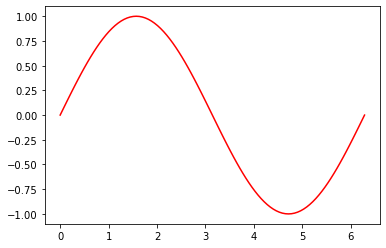

In [105]:
x = np.linspace(0, 2 * np.pi, 101)
y = np.sin(x)

fig, axes = plt.subplots()
axes.plot(x, y, color = 'red')

We can also plot several things in the same figure by calling `plt.plot` multiple times

In [ ]:
fig, axes = plt.subplots()
axes.plot(x, np.sin(x))
axes.plot(x, np.cos(x))

By default Matplotlib will cycle through line colors in a pre-defined order, however you can also set the style of each line explicitly:

In [ ]:
fig, axes = plt.subplots()
axes.plot(x, np.sin(x), color='red', linewidth=2, linestyle='--')
axes.plot(x, np.cos(x), color='black', linewidth=2)

`plt.plot` has many other parmeters that can be used to carefully tune the properties of the lines. The documentation can be found [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), but be warned, it is very dense!

### Adding labels and legends

`pyplot` also contains other functions that allow you to customize your figures. Let's make the same plot as above, but add some axes labels and a legend:

In [ ]:
x = np.linspace(0, 2 * np.pi, 1000)

fig, axes = plt.subplots()

axes.plot(x, np.sin(x), color='r', linewidth=2, linestyle='--', label='sine')
axes.plot(x, np.cos(x), color='k', linewidth=2, label='cosine')

# we can use Latex math between $ signs!
axes.set_xlabel(r'Time ($\tau$)', size=15)
axes.set_ylabel(r'Amplitude', size=15)
axes.set_title('Some trig functions', size=20)

# make the axis tick labels larger
axes.tick_params(labelsize=15)
# set lower/upper limits on x axis
axes.set_xlim(0, 2 * np.pi)

# loc=3 means put the legend in lower left corner:
# 3 is a magic number given in the documentation
axes.legend(loc=3)

<div class="alert alert-info" data-toggle="collapse" data-target="#note-mpl">

**ProTip** <i class="pull-right fa fa-chevron-down"></i>

<div id="note-mpl" class="collapse">
    
As you may have already figured out, while Matplotlib in principle provides a very complete
interface where every parameter can be tweaked, the user interface is janky as hell, and often
a **lot** of tweaking is necessary to get your plots looking how you like.
 
To avoid having to set the same options repeatedly you can tell matplotlib to globally set some options,
as described in the docs: http://matplotlib.org/users/customizing.html.
    
Alternatively you could use a higher-level frontend for Matplotlib such as [seaborn](http://seaborn.pydata.org/).
    
</div>
</div>

### Other kinds of plots

#### Scatter plot with error bars
Many of you will want to plot experimental data, where you want to see the individual data points. The below example shows how to achieve this:

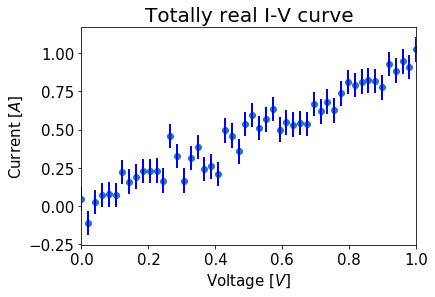

In [106]:
n_samples = 50
x = np.linspace(0, 1, n_samples)
sigma = 0.08

# signal + disorder
y = x + np.random.normal(loc=0, scale=sigma, size=n_samples)

fig, axes = plt.subplots()

axes.scatter(x, y)
# put error bars on the points, but put no lines between the errorbars
axes.errorbar(x, y, yerr=sigma, ecolor='b', elinewidth=2, linestyle='')

axes.set_xlim(0, 1)
axes.set_xlabel('Voltage [$V$]', size=15)
axes.set_ylabel('Current [$A$]', size=15)
axes.set_title('Totally real I-V curve', size=20)
axes.tick_params(labelsize=15)

#### Histograms

Histograms can be created using the `plt.hist` function:

In [ ]:
n_samples = int(1E4)
sigma = 10
mu = 10

samples = np.random.normal(loc=mu, scale=sigma, size=n_samples)

fig, axes = plt.subplots()

axes.hist(samples, bins=50)

axes.set_xlabel('Measured value', size=15)
axes.set_ylabel('Frequency', size=15)

#### Colorplots

You can make colorplots in matplotlib by creating an matrix of values and passing it to the `plt.imshow` function:

In [ ]:
def sinc(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.sin(r) / r

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
# compute sinc on a grid of points using numpy broadcasting
z = sinc(x.reshape(100, 1), y.reshape(1, 100))

print('array to plot has shape:', z.shape)

fig, axes = plt.subplots()

# need to pass the "extent" parameter to have the
# correct x and y axes
im = axes.imshow(z, extent=(x[0], x[-1], y[0], y[-1]),
                 cmap="viridis")

fig.colorbar(im)  # show a color scale next to the figure

### Saving plots

Once we have created a plot we can also save them to disk using `plt.savefig`:

In [ ]:
x = np.linspace(0, 2 * np.pi, 101)
y = np.sin(x)

fig, axes = plt.subplots()

axes.plot(x, y)

# matplotlib supports saving to several image formats, including png, svg and pdf
# just put a different extension on to the filename
fig.savefig('simple_plot.png')

<div class="alert alert-info" data-toggle="collapse" data-target="#note-mpl-mode">

**ProTip** <i class="pull-right fa fa-chevron-down"></i>

<div id="note-mpl-mode" class="collapse">
    
If you want static figures inside the notebook, rather than interactive widgets, use

`%matplotlib inline`

instead of

`%matplotlib widget`

</div>
</div>

## Advanced topics

#### Interactive plots with [Holoviews](http://holoviews.org/)

While Matplotlib provides reasonable plotting, it is not particularly well-adapted to interactive exploration of data sets.

The Holoviews library provides more features for interactively exploring your data.

First we import holoviews and tell it that we want it to display its output in the browser:

In [ ]:
import holoviews as hv
hv.notebook_extension('matplotlib')

Now we can plot our `sinc` function from before, and also slice the data along an axis, 
with the position of the axis controlled by a slider widget:

In [108]:
import holoviews as hv
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

z = sinc(x.reshape(100, 1), y.reshape(1, 100))


sinc_image = hv.Image(z, bounds=(x[0], y[0], x[-1], y[-1]))

hv.HoloMap({y: sinc_image * hv.HLine(y=y) + sinc_image.sample(y=y)
            for y in np.arange(-19, 20)}, kdims=['Y']).collate().cols(2)

NameError: name 'sinc' is not defined

---

# `scipy`: tools for scientific computing

So now we know how to contain our data (Numpy arrays) and plot it (Matplotlib), however we still need some tools that will enable us to do some more advanced data analysis and/or computations to generate data.

[Scipy](http://scipy.org) is the core library that provides these more advanced capabilites. In addition there is an ecosystem of so-called "[SciKits](http://scikits.appspot.com/)" that build on Scipy to provide functionality adapted to more specific problem domains.

Here, we will look at some of the key functionality that core Scipy provides.

**You should not attempt to do *all* these exercises**

Pick a couple of modules that are of interest to you and try the exercises for those. There is clearly no point in learning how to use `scipy`'s differential equation solver if you're never going to solve a differential equation in your research!

### [Dense linear algebra](https://docs.scipy.org/doc/scipy/reference/linalg.html)

We already saw that we can do basic linear algebra operations with Numpy (adding vectors and matrices, dot products,
matrix-vector product...), however Scipy provides functionality for more involved algorithms in `scipy.linalg` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg))

#### Exercises
+ create a 100x100 random matrix
  - find the eigenvalues and eigenvectors numerically
  - verify that the answer is correct (remember $M x = \lambda x$ for a matrix $M$ with eigenvalue $\lambda$ and 
    eigenvalue $x$)
+ create a 100x100 random matrix $M$ and a random vector $b$ with 100 entries
  -  solve the linear system $M x = b$ for the vector $x$
  - verify that the answer is correct

In [ ]:
import numpy as np
a = np.random.random()

#### Solution

In [ ]:
import scipy.linalg as la

M = np.random.rand(100, 100)  # random 3x3 matrix

evals, evecs = la.eig(M)  # see the docs for the format of the eigenvalues / vectors

assert np.allclose(M.dot(evecs), evals * evecs)

In [ ]:
b = np.random.rand(100,)
x = la.solve(M, b)

assert np.allclose(M.dot(x), b)

### [Sparse linear algebra](https://docs.scipy.org/doc/scipy/reference/sparse.html)

Sometimes you may be dealing with very *sparse* matrices/vectors, where many of the entries are zero. In such cases
we can use special data structures to avoid storing all of the (redundant) zeros. In addition there are different
algorithms that can be used to do things like compute eigenvalues of sparse matrices, or solve linear systems involving sparse matrices. The corresponding functions are found in `scipy.sparse` and `scipy.sparse.linalg` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html))

#### Exercises
+ create a 1000 x 1000 tridiagonal matrix with +2 on the diagonal and -1 on the upper/lower diagonals.
+ Find the 3 eigenvectors with the lowest eigenvalues using sparse linear algebra functions (**hint**: take advantage of the structure of the matrix to select the best routine for the job)
  

+ create a 1000 element vector $v$ with 0 in all entries and 1 in the first entry
+ using the same 1000x1000 matrix as before, solve the linear system $Mx = b$
    using sparse linear algebra functions

#### Solution

In [ ]:
import scipy.sparse as spa  # for sparse matrices
import scipy.sparse.linalg as sla  # for sparse linear algebra routines

diagonals = -np.ones((3, 1000))
diagonals[0, :] = 2

offsets = (0, -1, 1)

A = spa.dia_matrix((diagonals, offsets), shape=(1000, 1000)).tocsc()
sla.eigsh(A, k=3, which='SM')

In [ ]:
# solving linear systems M.x = b
b = np.zeros(1000)
b[0] = 1
x = sla.spsolve(A, b)

### [Numerical quadrature](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#general-integration-quad)

Scipy also wraps the venerable `quadpack` library to provide numerical evaluation of definite integrals in `scipy.integrate` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/integrate.html))

#### Exercises
+ estimate the integral of $\exp(-x^2)$ between 0 and 1
+ estimate the integral of $\exp(-x^2)$ between $-\infty$ and $\infty$

#### Solution

In [ ]:
import scipy.integrate as spi


def normal_dist(x):
    return np.exp(-x**2) / np.sqrt(np.pi)

# definite integral between 0 and 1
result, error = spi.quad(normal_dist, 0, 1)
print(result)

# can even handle improper integrals
result, error = spi.quad(normal_dist, -np.inf, np.inf)
print(result)

### [Ordinary differential equations](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#ordinary-differential-equations-odeint)

The `scipy.integrate` package also includes facilities for solving ordinary differential equations.
By default a hybrid algorithm that can handle both stiff and non-stiff problems is used, but you can select which
method to use as well as tuning the method parameters.

#### Exercises
##### Simple pendulum
a simple pendulum is defined by the system of equations

$$
\begin{aligned}
\frac{d\theta}{dt} &= \omega\\
\frac{d\omega}{dt} &= -\alpha\sin(\theta)
\end{aligned}
$$

where $\alpha$ is a model parameter
+ create a function `pendulum` that takes a 2-vector $(\theta, \omega)$ and a time, and returns $(\dot{\theta}, \dot{\omega})$
+ start the pendulum in a state $(\theta_0, 0)$ with $\alpha = 1$ and evolve it forward in time until $t=20$
+ plot $\theta$ as a function of time
+ graphically compare the result with the small-angle result $\theta(t) = \theta_0 \cos(\sqrt{\alpha}t)$

#### Solution

In [ ]:
alpha = 1


# function describing a simple pendulum system.
# takes the current state of the system (and the current time) and returns
# the time derivative.
def simple_pendulum(state, time):
    theta = state[0]
    omega = state[1]

    # dθ/dt = ω, dω/dt = -sin(θ)
    dtheta_dt = omega
    domega_dt = -alpha * np.sin(theta)

    return np.array([dtheta_dt, domega_dt])


# start the pendulum with some angle
theta_0 = np.pi / 100
omega_0 = 0
state_0 = np.array([theta_0, omega_0])

# what times do we want the solution?
times = np.arange(0, 20, 0.1)

# start in state_0 and find the solution for all times in `times`
solutions = spi.odeint(simple_pendulum, state_0, times)
small_angle_approx = theta_0 * np.cos(np.sqrt(alpha) * times)

# compare the numerical results and the small-angle approximation
fig, axes = plt.subplots()

axes.plot(times, solutions[:, 0], label='numerical soltn.')
axes.plot(times, small_angle_approx, linestyle='--', label='small θ approx.')
axes.set_xlabel('time')
axes.set_ylabel('θ')
axes.legend(loc=4)

### [Function optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#optimization-scipy-optimize)
Scipy includes a plethora of routines implementing algorithms for: curve fitting, minimum finding, root finding etc. in `scipy.optimize` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#optimization-scipy-optimize))

#### Exercises
##### Curve fitting
- load the data in "`curve_fitting_data.npy`" into a Numpy array
  + the array has shape `(2, 50)` where the first row is the independent variable, and the
    second row is the dependent variable
- plot the data using a scatter plot
- the data has been produced according to a model of the form $f(x) = \alpha x \exp(-\beta x)$ (plus some noise)
  where $\alpha$ and $\beta$ are the model parameters and $x$ is the independent variable.
  Estimate the model parameters
- plot the estimated model on top of the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Model_formula(indvar, model):
    indvar = x
    model = f(x)
    
    f(x) = alpha * x * np.exp(-belta * x)
    

alpha = constant
belta = constant

a = np.array(2, 50)
np.save('curve_fitting_data.npy', a)
x = np.load('curve_fitting_data.npy')

fig, axis = plt.subplots()

axis.plot()



#### Solution

In [ ]:
import scipy.optimize as spo

In [ ]:
### curve fitting

x, data = np.load('curve_fitting_data.npy')

# x is the independent variable, and the rest of the arguments are the model parameters
def model(x, alpha, beta):
    return alpha * x * np.exp(-beta * x)

# returns optimal values for parameters, and estimated covariance
params, params_cov = spo.curve_fit(model, x, data)
estimated_alpha, estimated_beta = params

In [ ]:
fig, axes = plt.subplots()

axes.scatter(x, data)
axes.plot(x, model(x, estimated_alpha, estimated_beta), label='estimated model')
axes.legend()

In [ ]:
### 1D minimization

def minimize_this(x):
    return -x * np.exp(-x)

result = spo.minimize_scalar(minimize_this)

print('result:', result.x, 'expected:', 1)

In [ ]:
### root finding

def find_my_roots(x):
    return (x - 3)**2

# use newton's method
print(spo.newton(find_my_roots, x0=0))

### [Fourier Transforms](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#fourier-transforms-scipy-fftpack)

Scipy also wraps the venerable `FFTPACK` library for computing 1D and 2D Fourier transforms using the fast fourier transform (FFT) algorithm in `scipy.fftpack` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#fourier-transforms-scipy-fftpack))

#### Exercises
##### 1D transforms
+ create a function that evaluates $g(x) = cos(2\pi f_0 x) + cos(2\pi f_1 x)$
+ create an array that samples the function using 200 points on the interval [0, 1]
+ find the Fourier transform of this sample
+ find out what format the transformed array is in
+ plot the power spectrum of the sample as a function of frequency

#### Solution

In [ ]:
import scipy.fftpack as fftpack

In [ ]:
n_samples = 200
x, x_step = np.linspace(0, 1, n_samples, retstep=True)

# sum of a couple of cosines with different frequencies
y = np.cos(50 * 2 * np.pi * x) +  np.cos(80 * 2 * np.pi * x)

# the first half of the array contains the positive frequency components
# the second half is the negative frequencies
y_fft = fftpack.fft(y)
# instead of trying to map things correctly ourselves,
# there is a handy function to get the frequencies too
freqs = fftpack.fftfreq(n_samples, x_step)

power_spectrum = np.abs(y_fft)**2 / n_samples

fig, axes = plt.subplots()

axes.plot(freqs, power_spectrum)

In [ ]:
### 2D fourier transforms

N = 30

y_fft = np.zeros((N, N))
y_fft[5, 10] = 1
y_fft[-5, -10] = 1

y = fftpack.ifftn(y_fft)  # inverse Fourier transform in N dimensions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.imshow(y_fft, cmap="gray")
ax2.imshow(y.real, cmap="gray")

### [Image manipulation](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html)

As we saw in the Matplotlib section, images are just 2D arrays. `scipy.ndimage` ([reference documentation](https://docs.scipy.org/doc/scipy/reference/ndimage.html)) contains algorithms for manipulating images, applying filters etc.

Loading images from files requires the `imageio` module (which is not a part of scipy).

#### Exercises

##### Simple filters
+ create a 2D numpy array representing a black square (pixel value 1) on a white background (pixel value 0)
+ show it with `pyplot.imshow`
+ rotate the square by 45 degrees
+ apply a sobel (gradient) filter to show the edges in the image
  
##### Feature identification
+ load the image "blobs.png" into a Numpy array
+ identify (label) the distinct blobs in the image
+ find the "centre of mass" of each of the blobs
+ plot the blobs and mark their centres of mass
+ estimate the area (in pixels) of each of the blobs
  
(note that each of these tasks is not as difficult as it first appears)

#### Solution

In [ ]:
import scipy.ndimage as ndimage
import imageio

In [ ]:
### applying filters

N = 100

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))

# make a simple square
square = np.zeros((N, N))
square[N // 4: -N // 4, N // 4: -N // 4] = 1
ax1.imshow(square, cmap="gray")

# rotate the square by 45 degrees
square = ndimage.rotate(square, 45, reshape=False)
ax2.imshow(square, cmap="gray")

# apply a sobel filter (gradient)
sx = ndimage.sobel(square, axis=0)  # gradient in x direction
sy = ndimage.sobel(square, axis=1)  # gradient in y direction
sob = np.sqrt(sx**2 + sy**2)  # square magnitude of gradient
ax3.imshow(sob, cmap="gray")

In [ ]:
### labelling features in an image

blobs = imageio.imread('blobs.png', pilmode='L')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.imshow(blobs, cmap='gray')
ax1.set_title('blobs', size=20)

labeled_blobs, n_features = ndimage.label(blobs)

ax2.imshow(labeled_blobs, cmap='viridis')
ax2.set_title('labelled blobs', size=20)

# calculate the center of mass of each labelled feature
centers = ndimage.center_of_mass(blobs, labeled_blobs, np.arange(n_features) + 1)
# mark the centers of mass on the image
x, y = zip(*centers)  # unzip the pairs (x, y) into two lists
ax2.scatter(y, x)  # invert the coordinates, as we are talking about row/column indices now

##  
---

# Problem solving with Python

In the context of your daily research you will often come up against problems that can't be solved
directly using the above-described tools.

In this situation it is good to know how you can approach problems. In practice you will often find that
the following crib sheet will be satisfactory in a surprising number of cases:

### Algorithm for problem solving

- identify the key words of your problem, append "Python" and stick it into google
- see if there are code snippets that do approximately what you want:
  + [StackOverflow](http://stackoverflow.com/) is a good source of these
  + random technical blogs are also not bad if they are highly ranked by google
- if the snippet uses a package that you do not have installed:
  + try installing it by running `pip install <packagename>` in a terminal
  + if you are using the [Anaconda](https://www.continuum.io/downloads) Python distribution,
    you can alternatively use `conda install <packagename>`
  + if that doesn't work, google the package name, visit the package's official
    website and look for installation instructions
- copy/paste a code snippet that looks promising
- get a **minimum working example** which you can then **modify and adapt** (starting from
  scratch is hard)
- iteratively improve on the minimum working example until your program does what you want

#### Points to remember
+ It's OK not to understand everything straight away
+ Skim read resources (documentation, installation instructions...) while stuff works. When stuff doesn't work anymore, be ready to re-read these resources in more detail
+ Google is your friend. So is [StackOverflow](http://stackoverflow.com/)

#### Caveats

+ Not all examples/snippets are up to date, reliable, or written by someone who has the slightest clue what they are doing
+ Often the accepted answer on [StackOverflow](http://stackoverflow.com/) is good enough for a first iteration,
  although pay attention to the responder's "reputation" to gauge how reliable the answer may be.
+ sometimes you may come across [funny answers](http://stackoverflow.com/questions/1732348/regex-match-open-tags-except-xhtml-self-contained-tags) too...

## Scenario

Your predecessor has left you some experimental data, in an excel spreadsheet. You want to plot and analyze the data in ways that are not provided by Excel; what do you do?

### Solution

+ Copy and paste the data from the excel worksheet to a text file.
+ Import the data using `numpy.loadtxt`
+ Analyze and plot

This may seem contrived, but **often the simplest solution is the best**.

## Scenario

You have data in an Excel spreadsheet "`current_voltage_data.xlsx`", but it is routinely updated by colleagues. In addition, your supervisor
wants to have not only the plots you produce, but also the data after you have run your analysis on it,
and she wants it in an Excel spreadsheet.

### Solution

+ Google the string: "`data analysis excel python`"
+ First hit is a video tutorial that mentions "pandas"
+ Google "pandas python excel"
+ First hit is documentation from the Pandas website about a function "`read_excel`"; seems promising!
+ Install "pandas" with "`pip install pandas`"
+ Try to use `"read_excel"` (it will fail complaining about `xlrd`
+ Install `xlrd` with pip
+ Import data
+ Google "scipy linear regression"
+ copy snippet from website
+ google for "pandas data to numpy array"
+ calculate linear regression
+ plot
+ google for how to output data to excel
+ try to use "to_excel" (it will fail complaining about `openpyxl`)
+ Install `openpyxl` with pip
+ save to Excel format

In [ ]:
import pandas
import scipy.stats as stats

# read in and clean up data
data_frame = pandas.read_excel('current_voltage_data.xlsx')
cleaned_data = data_frame.dropna()  # remove undefined data entries 
cleaned_data_matrix = cleaned_data.values  # get data as numpy array

# perform linear regression
linregress = stats.linregress(cleaned_data_matrix)

# plot the data
x, y = cleaned_data_matrix.transpose()

fig, axes = plt.subplots()
axes.scatter(x, y)
axes.plot(x, linregress.slope * x + linregress.intercept, linewidth=2, color='r')

cleaned_data.to_excel('output.xlsx', index=False)

##  
---

# Extended Exercises

These exercises require you to use functionality from several of the libraries introduced above

## Explore!

At the start of the notebook there were just a few examples of scientific Python packages for treating different problem domains.

Find a Python package that you think could be useful in your research. Try installing it and testing out some of the usage examples

##  
---

## Animal Statistics

The file in `populations.txt` describes the populations of hares and lynxes (and carrots) in nothern Canada over the course of 20 years.

#### Tasks

+ load and plot the data in `populations.txt`. Don't forget to label your axes and produce a legend!
+ Print the mean and standard deviation of the population for each species
+ Print which species has the largest population for each year (**hint**: `np.argmax`)
+ Print for which years the populations of any of the species above 50000
+ For each species, print the 2 years when their population was the lowest
+ Plot the change in the hare population and the number of lynxes over time
+ Calculate the correlation coefficient between the change in the hare population and the number of lynxes.

#### Solution

In [ ]:
data = np.loadtxt('populations.txt')

years, hares, lynxes, carrots = data.T  # trick: columns to variables
populations = data.T[1:]

species = ('Hare', 'Lynx', 'Carrot')

fig, axes = plt.subplots()
axes.plot(years, hares, years, lynxes, years, carrots)
axes.set_xlabel('year')
axes.set_ylabel('population')
axes.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

In [ ]:
means = np.mean(populations, axis=1)
std_devs = np.std(populations, axis=1)
for organism, mean, std in zip(species, means, std_devs):
    print(organism, '-- population mean:', mean, ' -- population std dev:', std)

In [ ]:
max_idxs = np.argmax(populations, axis=0)
for year, i in zip(years, max_idxs):
    print('year', int(year), 'had mostly: ', species[i])

In [ ]:
which_species, which_years = np.argwhere(populations > 50000).T
print('the following years had > 50000 of an organism:', *years[which_years])

In [ ]:
fig, axes = plt.subplots()
axes.plot(years[1:], np.diff(hares), years, lynxes)
axes.set_xlabel('year')
axes.set_ylabel('population')
axes.legend(('Change in Hares', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

In [ ]:
least_populous_idxs = np.argsort(populations, axis=1)[:, :2]

for organism, least_populous_years in zip(species, years[least_populous_idxs]):
    print(organism, 'was least populous in years: ', *least_populous_years)

In [ ]:
print('The correlation coefficient between the lynx population and the change in the Hare population is',
      np.corrcoef(np.diff(hares), lynxes[1:])[1, 0])

##  
---

## [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

The Mandelbrot set is the set of complex numbers $c$ for which the function $f_c ( z ) = z^2 + c$ does not diverge when iterated from $z = 0$.

In this exercise we will sample and vizualize the Mandelbrot set using Numpy and Matplotlib.

#### Tasks
+ write a function `mandelbrot` that takes a complex value $c$, evaluates $f_c$ 100 times starting from $0$, and returns the
  absolute value of the result
+ evaluate your function on a grid of complex numbers (**hint**: use numpy operations and writing `c = x + 1j * y`
  where `x` and `y` are real)
+ plot the result using `pyplot.imshow`
+ improve your `mandelbrot` function so as to remove the `RuntimeWarning` that you get when evaluating it at points that 
  are not in the Mandelbrot set (what is happening here?)
  
#### Harder tasks
+ make a visualisation that allows interactive zooming
+ make the visualisation re-evaluate the points in the mandelbrot set when
  the user zooms (so that more structure is revealed by zooming)
+ do you think you can speed up your solution?

+ use [Cython](http://cython.org/) to rewrite your `mandelbrot` function. Take advantage of multiple CPU cores when
  evaluating the function by using [prange](http://cython.readthedocs.io/en/latest/src/userguide/parallelism.html).
  You can use the [Cython cell magic](http://cython.readthedocs.io/en/latest/src/quickstart/build.html) to auto-compile
  your code from within the notebook.

### Solution

In [ ]:
import numpy as np

In [ ]:
def mandelbrot(c):
    z = 0
    for i in range(100):
        z = z**2 + c
    return np.abs(z)

In [ ]:
x = np.linspace(-2, 1, 500)
y = np.linspace(-1, 1, 500)
M = x[None, :] + 1j * y[:, None]

In [ ]:
R = mandelbrot(M)

In [ ]:
fig, axes = plt.subplots()
axes.imshow(R)

In [ ]:
%load_ext Cython

In [ ]:
%%cython --compile-args=-fopenmp --link-args=-fopenmp --annotate

import numpy as np
from cython.parallel cimport prange
from cython cimport boundscheck

cdef double mandelbrot_inner(complex c) nogil:
    cdef complex z = 0
    for i in range(100):
        z = z * z + c
    return z.real * z.real + z.imag * z.imag

@boundscheck(False)
def mandelbrot_cython(points):
    cdef complex[:] linear_points = points.reshape(-1)
    cdef long i, size = linear_points.shape[0]
    cdef double[:] result = np.empty((linear_points.shape[0],), dtype=float)
    for i in prange(size, nogil=True):
        result[i] = mandelbrot_inner(linear_points[i])
    return np.asarray(result).reshape(points.shape)        

In [ ]:
x = np.linspace(-2, 1, 1000)
y = np.linspace(-1, 1, 1000)
M = x[None, :] + 1j * y[:, None]

In [ ]:
%timeit mandelbrot(M)

In [ ]:
%timeit mandelbrot_cython(M)

##  
---

## [Lorenz attractor](https://en.wikipedia.org/wiki/Lorenz_system)

The Lorenz system is a system of ordinary differential equations that displays chaotic solutions for certain parameter values.

The system is defined by

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y - x)\\
\frac{dy}{dt} &= x(\rho - z) - y\\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$

where $(x, y, z)$ are the coordinates, and $\beta$, $\sigma$, and $\rho$
are parameters.

In this exercise we will numerically solve the Lorenz system, visualize the solution with Matplotlib, and explore the parameter space

#### Tasks
+ write a function, `lorenz`, that takes a 3-vector of coordinates $(x, y, z)$ and the current time, and
  returns a 3-vector $(\dot{x}, \dot{y}, \dot{z})$ (use the values $\beta=8/3$, $\sigma=10$, and $\rho=28$
  for now)
+ use `scipy.integrate.odeint` with your `lorenz` function to solve the lorenz system
+ plot the trajectory projected onto the $x-y$, $y-z$ and $x-z$ planes, respectively
+ this system shows sensitivity to initial conditions; estimate the [Lyapunov exponent](https://en.wikipedia.org/wiki/Lyapunov_exponent) of the system.

#### Harder Tasks
+ create a 3D visualization instead of the 3 projected visualizations
+ estimate the positions of the "attractor" points

### Solution

In [ ]:
import scipy.integrate as spi
beta = 8/3
sigma = 10
rho = 10


def lorenz(state, t):
    x, y, z = state
    deriv = np.empty((3,))
    deriv[0] = sigma * (y - x)
    deriv[1] = x * (rho - z) - y
    deriv[2] = x * y - beta * z
    return deriv

In [ ]:
times = np.linspace(0, 50, 10000)
start = np.ones((3,))
result = spi.odeint(lorenz, start, times)
x, y, z = result.transpose()

In [ ]:
fig, axes = plt.subplots()
axes.plot(x, z)

# Further reading

http://www.scipy-lectures.org/index.html  -- a more in-depth and professional version of this class